Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Load and Explore the Dataset

In [5]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Data Preprocessing

Remove Unnecessary Columns.
Handle Missing Values.
Select Relevant Features for clustering.



In [6]:
print(data.isnull().sum())

# Assuming only
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Data Scaling
Standardize the data to ensure each feature contributes equally to the clustering.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determine Optimal Number of Clusters (Using the Elbow Method)
The Elbow Method helps determine the best number of clusters by plotting the Within-Cluster-Sum of Squared Errors (WCSS) for each cluster count.

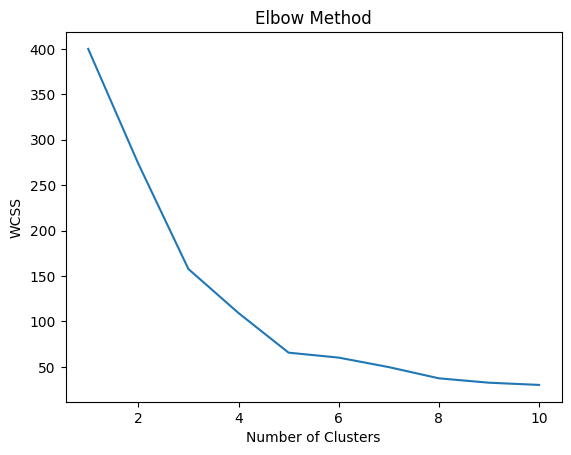

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Apply K-Means Clustering
Choose the optimal number of clusters from the Elbow plot

In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_


Visualize the Clusters
Plot the clusters to observe customer groups based on purchase history.

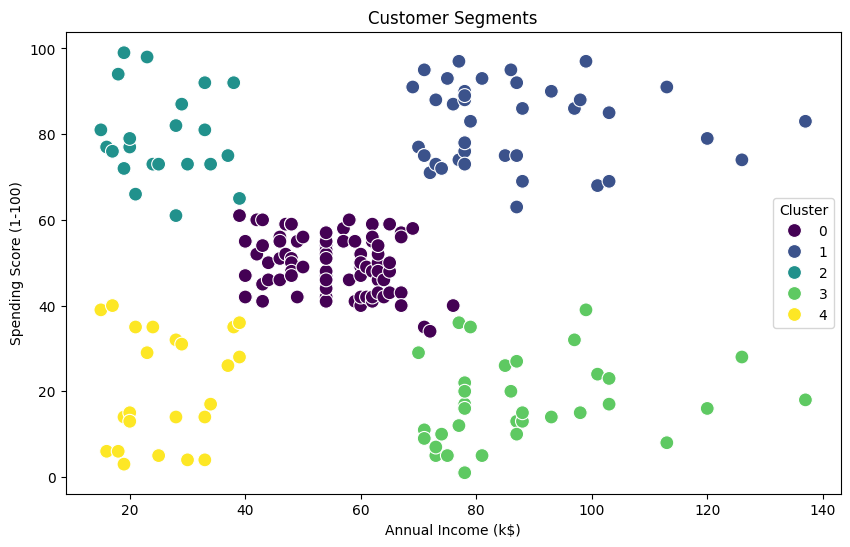

In [10]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
